# Search Results for Optimal number of topics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

First lets load the results from running search_for_best_num_topics.py

In [2]:
lda_search_results = pd.read_json('data/training/test_results.json')

In [3]:
print('Shape: ', lda_search_results.shape)
lda_search_results.head(5)

Shape:  (51, 7)


,topics,umass_coherence,c_v_coherence,c_uci_coherence,c_nmpi_coherence,log_perplexity,jaccard_distance
0,10,-2.154858,0.446033,0.135405,0.020516,-8.390468,0.178818
1,11,-2.056075,0.442623,0.140633,0.020080,-8.448297,0.187039
2,12,-2.118732,0.441749,0.147115,0.022118,-8.480223,0.175106
3,13,-2.210482,0.446707,0.126536,0.021832,-8.520421,0.165461
4,14,-2.191203,0.450175,0.186551,0.025824,-8.560022,0.164125


the output of gensims LdaModel.log_perplexity() is as the name implies the log perplexity so we must convert this to visualize the perplexity.

In [4]:
lda_search_results['perplexity'] = np.exp(lda_search_results['log_perplexity'])

In [6]:
def plot_results(df:pd.DataFrame, smooth:int|None=None):
    """plots the results of the six different coherence scores, form search_for_best_num_topics.py,

    Args:
        df (pd.DataFrame): results data frame
        smooth (int | None, optional): smoothing parameter passed to pandas.DataFrame.rolling. Defaults to None.
        NOTE: perplexity is not included in smoothing
    """

    if smooth is not None:
        df.iloc[:, :-1] = df.iloc[:, :-1].rolling(smooth).mean()

    bars = [
        df.sort_values(by='umass_coherence', ascending=False)['topics'].values[0],
        df.sort_values(by='c_v_coherence', ascending=False)['topics'].values[0],
        df.sort_values(by='c_uci_coherence', ascending=False)['topics'].values[0],
        df.sort_values(by='c_nmpi_coherence', ascending=False)['topics'].values[0],
        df.sort_values(by='jaccard_distance', ascending=True)['topics'].values[0],
        df.sort_values(by='perplexity', ascending=True)['topics'].values[0]
    ]
    

    titles = [
        f"u_mass coherence (max={df['umass_coherence'].max():.6f})", 
        f"c_v coherence (max={df['c_v_coherence'].max():.6f})", 
        f"c_uci coherence (max={df['c_uci_coherence'].max():.6f})", 
        f"c_nmpi coherence (max={df['c_nmpi_coherence'].max():.6f})", 
        f"jaccard distance (min={df['jaccard_distance'].max():.6f})", 
        f"perplexity (min={df['perplexity'].max():.6f})"
    ]

    fig, ax = plt.subplots(3, 2, figsize=(15, 10))
    
    for col, ax_, title, bar in zip(df.columns[1:], ax.flatten(), titles, bars):
        sns.lineplot(data=df, x='topics', y=col, ax=ax_)
        ax_.set_title(title)
        ax_.axvline(bar, color='k')
        ax_.text(bar, -0.01, str(int(bar)), color='k', ha='center', va='top', transform=ax_.get_xaxis_transform())

    plt.tight_layout()

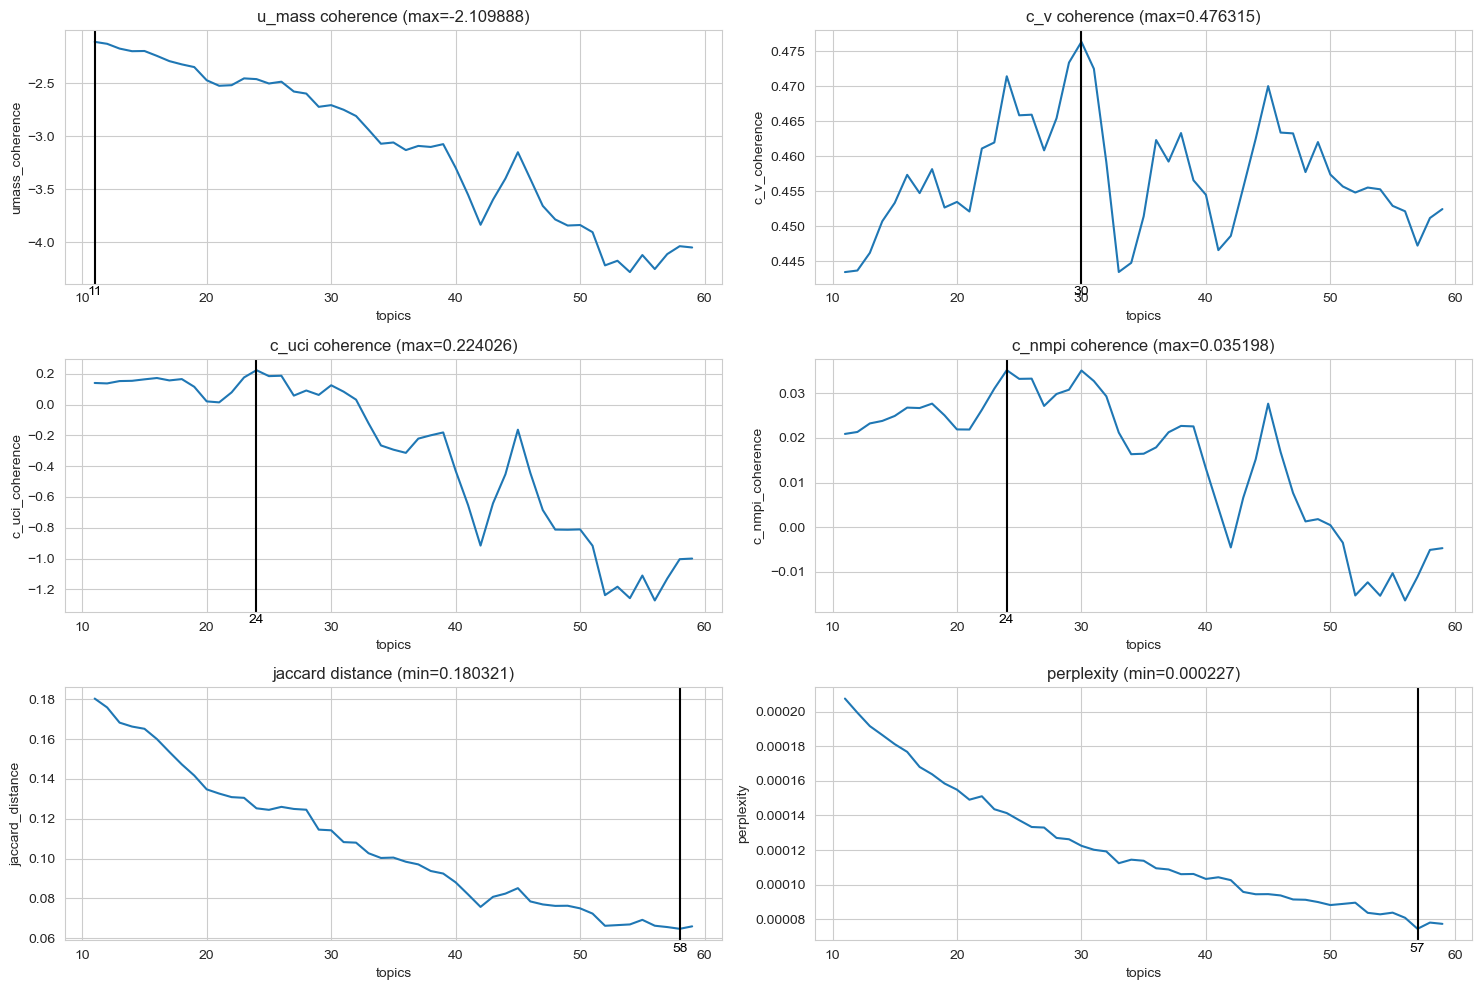

In [10]:
plot_results(lda_search_results.drop('log_perplexity', axis=1), smooth=3)

If we dont smooth the results we get an agreement from c_v, c_uci, c_nmpi at 25. if we use a smoothing parameter of 3 we get an agreement of c_uci and c_nmpi at 24, but there is also a jump in those two at 30. And after inspecting the topics at 24, 25 and 30, we are going to choose 30 topics as they make the most sense after closer inspection. this demonstrates the difficulty if selecting the optimal number of topics. Ultimately these techniques give a clue where to look but human inspection has no equal in this determination.